<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020_private/blob/main/mnist_cnn_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 99.6% test accuracy after 40 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop, Adam, Adadelta

from keras.utils.vis_utils import plot_model
from IPython.display import Image 

from keras.callbacks import EarlyStopping

#augmentation
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 10
epochs = 200

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)



60000 train samples
10000 test samples


# **Reduce the dataset size**

In [219]:
N_TRAIN_EXAMPLES = 1000 #3000
N_TEST_EXAMPLES = 10000

x_train = x_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

In [220]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION

datagen = ImageDataGenerator( 
        rotation_range=30,  
        zoom_range = [0.70,1.1],   
        width_shift_range=0.1,  
        height_shift_range=0.1)
'''
datagen = ImageDataGenerator( 
        rotation_range=0,  
        zoom_range = 0.0,  
        width_shift_range=0.0, 
        height_shift_range=0.0)
'''

'\ndatagen = ImageDataGenerator( \n        rotation_range=0,  \n        zoom_range = 0.0,  \n        width_shift_range=0.0, \n        height_shift_range=0.0)\n'

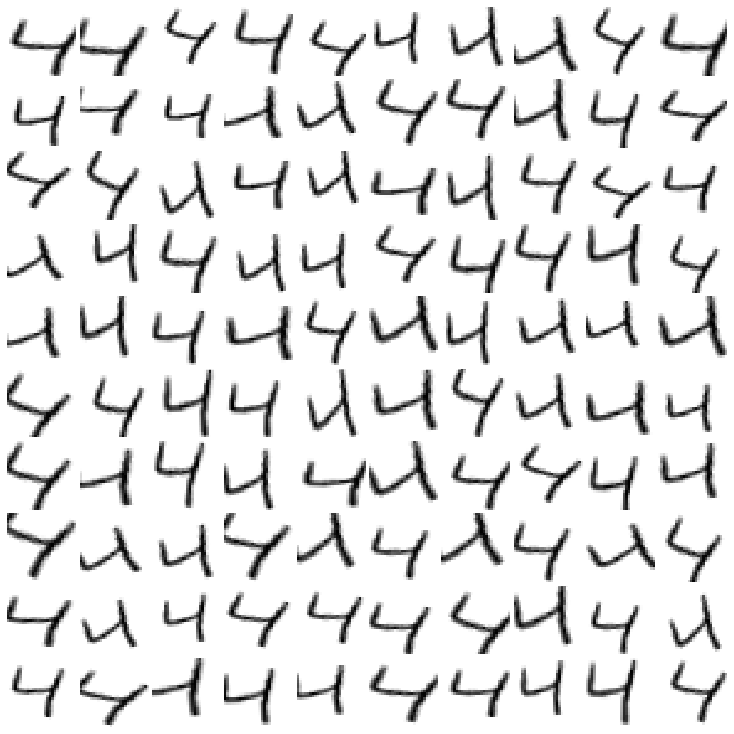

In [221]:
# see augmentation example (single digit)
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(0, 100):
    for X_train, Y_train in datagen.flow(x_train[2:3], y_train[2:3], batch_size=1, shuffle=False):
         plt.subplot(10,10,i+1)
         plt.imshow(X_train[0].reshape((img_rows, img_cols)), cmap=plt.cm.binary, interpolation='nearest')
         plt.axis('off')
         break

plt.show()

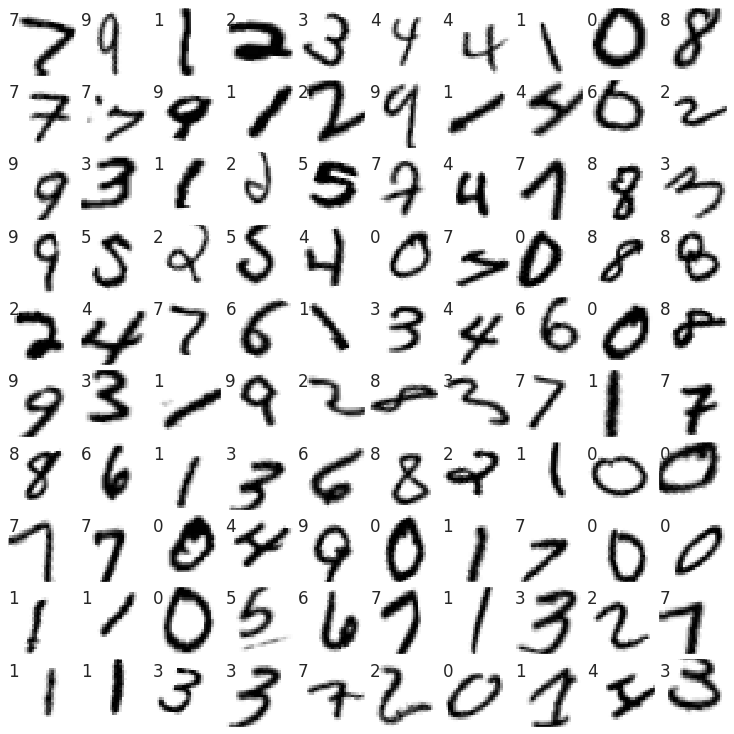

In [222]:
#visualize the digits

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# generate augmented plot
X_train, Y_train = datagen.flow(x_train,y_train, batch_size=100).next()
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(np.argmax(Y_train[i])))

In [223]:
# Our old fully connected (dense) network
#model = Sequential()
#model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



model.summary()



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)        

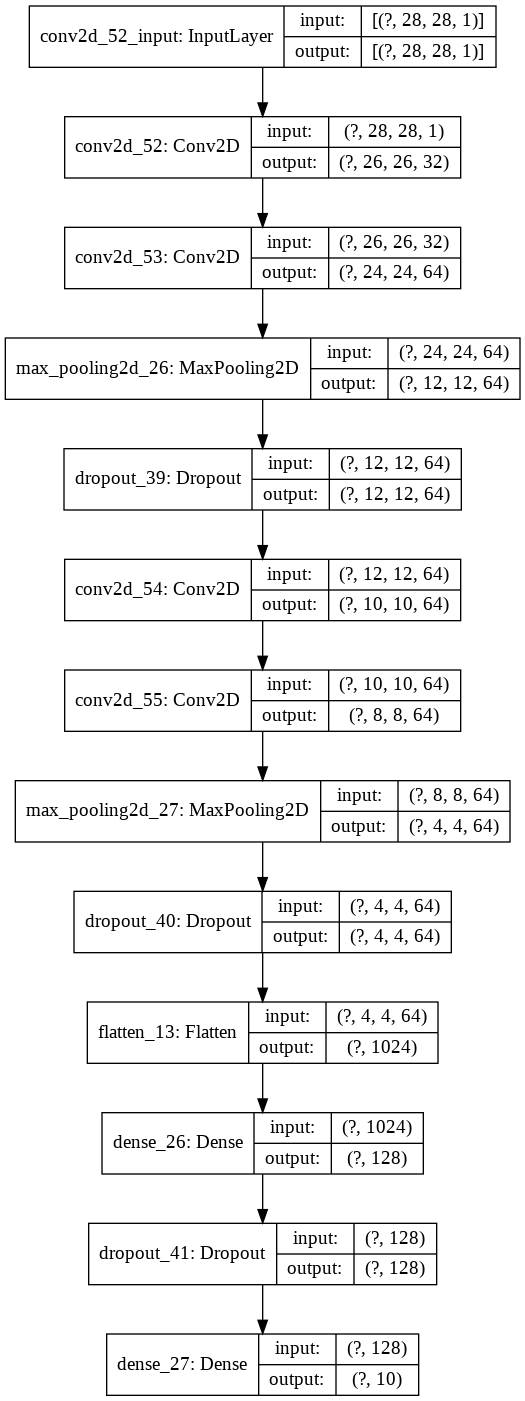

In [224]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

In [225]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_accuracy', patience = 12, verbose=1)

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks = [es])


Epoch 1/200
8/8 [==============================] - 1s 89ms/step - loss: 2.2930 - accuracy: 0.1240 - val_loss: 2.2222 - val_accuracy: 0.4359
Epoch 2/200
8/8 [==============================] - 1s 67ms/step - loss: 2.2066 - accuracy: 0.1960 - val_loss: 1.8461 - val_accuracy: 0.5374
Epoch 3/200
8/8 [==============================] - 1s 66ms/step - loss: 2.0153 - accuracy: 0.2710 - val_loss: 1.4240 - val_accuracy: 0.6457
Epoch 4/200
8/8 [==============================] - 1s 63ms/step - loss: 1.8100 - accuracy: 0.3660 - val_loss: 1.1721 - val_accuracy: 0.6721
Epoch 5/200
8/8 [==============================] - 1s 64ms/step - loss: 1.6790 - accuracy: 0.4280 - val_loss: 0.9382 - val_accuracy: 0.7984
Epoch 6/200
8/8 [==============================] - 1s 65ms/step - loss: 1.5114 - accuracy: 0.4950 - val_loss: 0.7560 - val_accuracy: 0.8198
Epoch 7/200
8/8 [==============================] - 1s 64ms/step - loss: 1.4688 - accuracy: 0.5320 - val_loss: 0.6730 - val_accuracy: 0.8642
Epoch 8/200
8/8 [===

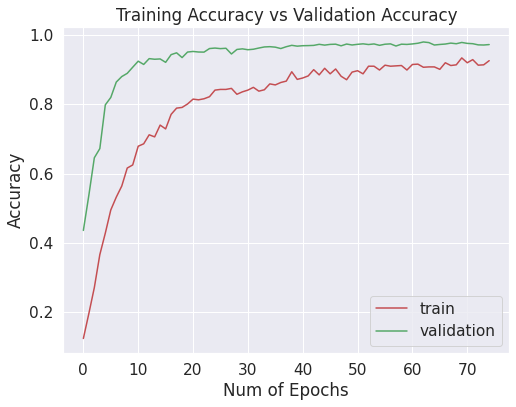

In [226]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])




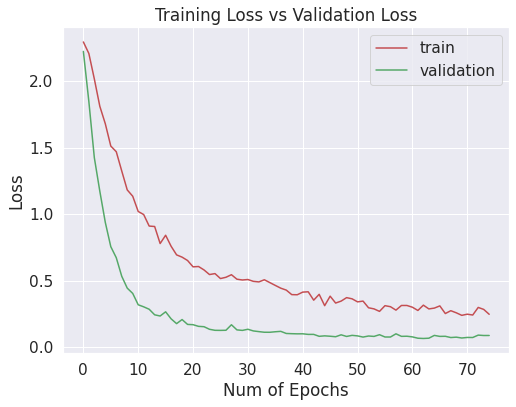

In [227]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()


In [228]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08906155079603195
Test accuracy: 0.9725000262260437


In [229]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 98.20% , Test: 97.25% 


In [230]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



313/313 - 0s
[[ 971    0    1    0    3    0    2    2    1    0]
 [   3 1120    3    1    0    1    1    6    0    0]
 [   1    1  989    4    2    0    0   33    2    0]
 [   0    0    1  997    0    4    0    3    3    2]
 [   1    0    1    0  923    0    1    7    2   47]
 [   1    1    0    4    1  881    2    1    0    1]
 [   4    4    0    0    5    5  940    0    0    0]
 [   1    1    4    1    2    0    0 1011    1    7]
 [  10    0    9    2    7    5    1    2  909   29]
 [   0    0    0    1    5    7    0   12    0  984]]


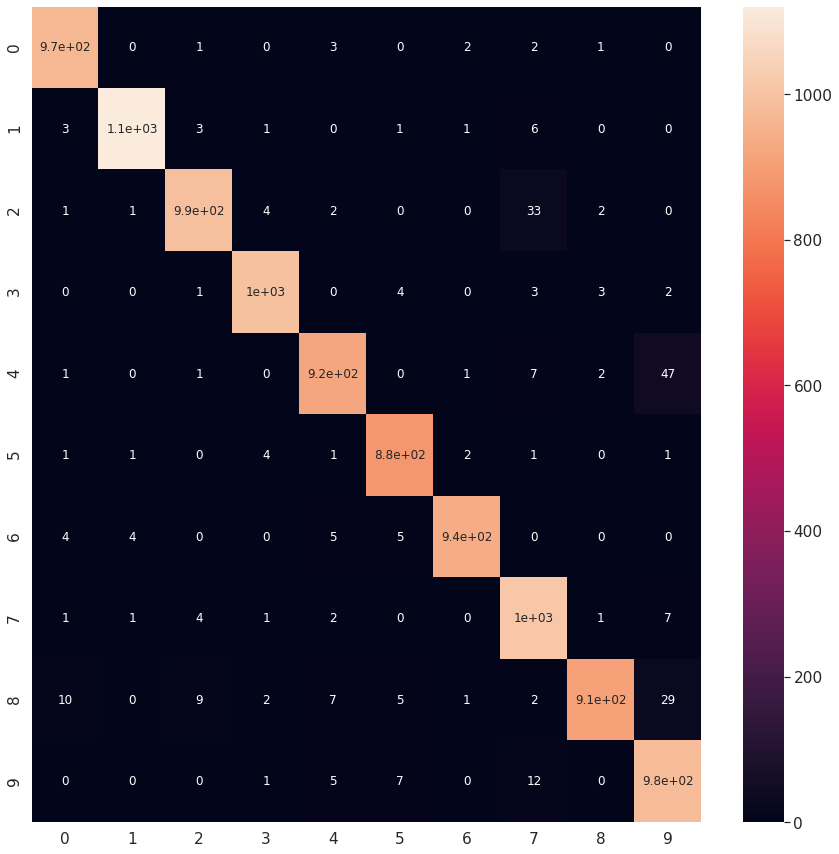

In [231]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()


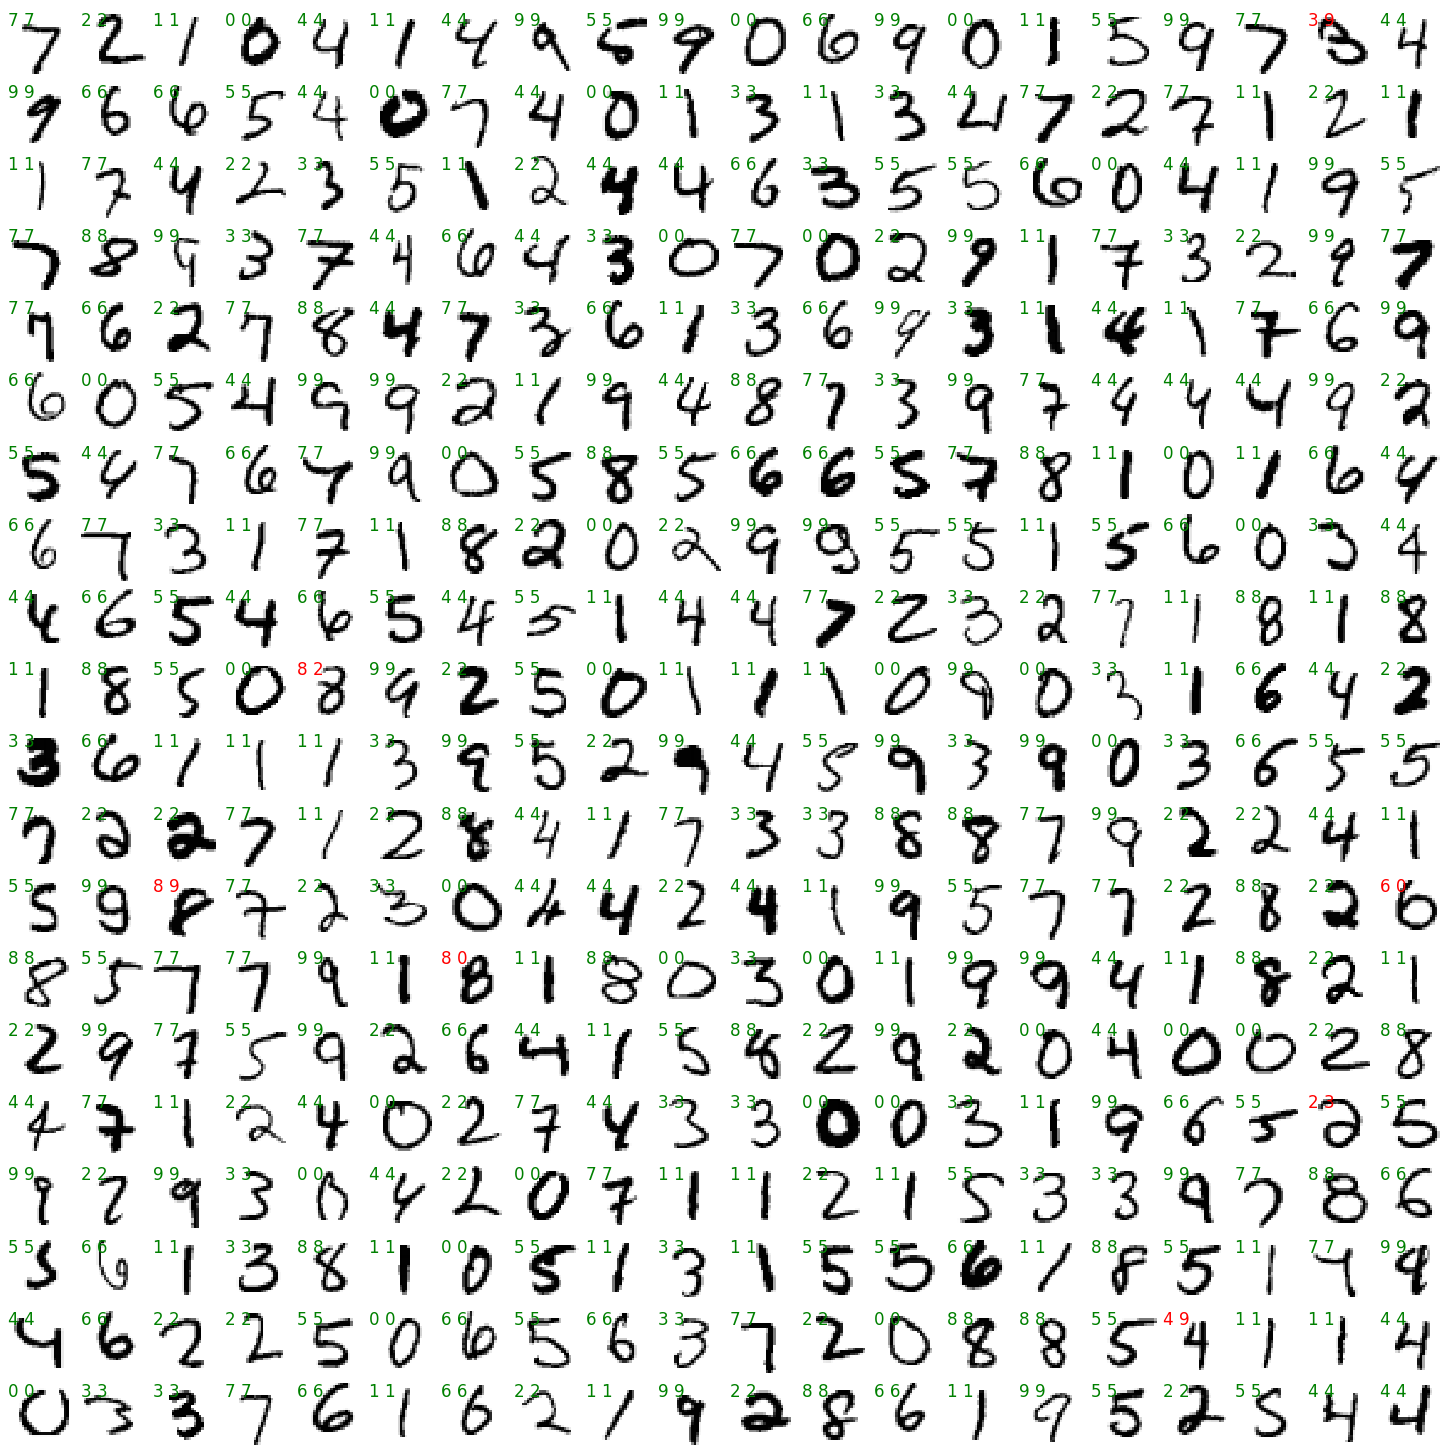

In [232]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='red')

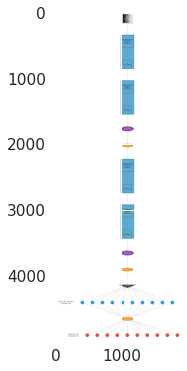

In [233]:
# Creates the graph.png file

! pip3 install keras-visualizer
from keras_visualizer import visualizer  

#create the graph.png image
visualizer(model=model, view=True, format='png', filename='graph')

#show the graph
import matplotlib.image as mpimg
img = mpimg.imread('graph.png')
imgplot = plt.imshow(img,)
plt.show()
